## Introduction:

In this competition, you are provided with 1.5 years of customers behavior data from Santander bank to predict what new products customers will purchase. 

The data starts at 2015-01-28 and has monthly records of products a customer has, such as "credit card", "savings account", etc. 

You will predict what additional products a customer will get in the last month, 2016-06-28, in addition to what they already have at 2016-05-28. These products are the columns named: ind_(xyz)_ult1, which are the columns #25 - #48 in the training data. You will predict what a customer will buy in addition to what they already had at 2016-05-28. 

Cometition Link ==> https://www.kaggle.com/c/santander-product-recommendation/data

Fork Notebooks ==> https://www.kaggle.com/apryor6/detailed-cleaning-visualization-python

In [579]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import timeit
import warnings
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None 

## Analysis steps:

1. Data exploration 
2. Data cleaning, cleansing (including feature reduction) 
3. Modeling 

## Reading the data ..

The size of the data is about 1.3 GB ! .. 

Reading it as one unit using the traditional built in functions won't help ! .. 

Let's try to read them as chuncks .. 

In [580]:
reader = pd.read_csv('train_ver2.csv', chunksize=1000000, header=0)

In [581]:
reader.get_chunk()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0,6,1,...,0,0,0,0,0,0,0,0,0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0,35,1,...,0,0,0,0,0,0,0,0,0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0,35,1,...,0,0,0,0,0,0,0,0,0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0,35,1,...,0,0,0,0,0,0,0,0,0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0,35,1,...,0,0,0,0,0,0,0,0,0,0
5,2015-01-28,1050615,N,ES,H,23,2012-08-10,0,35,1,...,0,0,0,0,0,0,0,0,0,0
6,2015-01-28,1050616,N,ES,H,23,2012-08-10,0,35,1,...,0,0,0,0,0,0,0,0,0,0
7,2015-01-28,1050617,N,ES,H,23,2012-08-10,0,35,1,...,0,0,0,0,0,0,0,0,0,0
8,2015-01-28,1050619,N,ES,H,24,2012-08-10,0,35,1,...,0,0,0,0,0,0,0,0,0,0
9,2015-01-28,1050620,N,ES,H,23,2012-08-10,0,35,1,...,0,0,0,0,0,0,0,0,0,0


We are working only on 1000000 records (just for obtaining better performance) ..

Let's divide it to training and validation .. 

In [582]:
# # data .. 80% of the data as training data
# train = (len(reader.get_chunk())*80)/100
# ntrain, ntest = reader.get_chunk()[:train], reader.get_chunk()[train+1:]

In [583]:
# len(ntrain), len(ntest) #training vs testing data 

In [584]:
ntrain = reader.get_chunk()

In [585]:
ntrain.columns.to_series().groupby(ntrain.dtypes).groups

{dtype('int64'): ['ncodpers',
  'ind_ahor_fin_ult1',
  'ind_aval_fin_ult1',
  'ind_cco_fin_ult1',
  'ind_cder_fin_ult1',
  'ind_cno_fin_ult1',
  'ind_ctju_fin_ult1',
  'ind_ctma_fin_ult1',
  'ind_ctop_fin_ult1',
  'ind_ctpp_fin_ult1',
  'ind_deco_fin_ult1',
  'ind_deme_fin_ult1',
  'ind_dela_fin_ult1',
  'ind_ecue_fin_ult1',
  'ind_fond_fin_ult1',
  'ind_hip_fin_ult1',
  'ind_plan_fin_ult1',
  'ind_pres_fin_ult1',
  'ind_reca_fin_ult1',
  'ind_tjcr_fin_ult1',
  'ind_valo_fin_ult1',
  'ind_viv_fin_ult1',
  'ind_recibo_ult1'],
 dtype('float64'): ['ind_nuevo',
  'indrel',
  'indrel_1mes',
  'tipodom',
  'cod_prov',
  'ind_actividad_cliente',
  'renta',
  'ind_nomina_ult1',
  'ind_nom_pens_ult1'],
 dtype('O'): ['fecha_dato',
  'ind_empleado',
  'pais_residencia',
  'sexo',
  'age',
  'fecha_alta',
  'antiguedad',
  'ult_fec_cli_1t',
  'tiprel_1mes',
  'indresi',
  'indext',
  'conyuemp',
  'canal_entrada',
  'indfall',
  'nomprov',
  'segmento']}

## Null values inside each variable:

In [586]:
ntrain.isnull().any()

fecha_dato               False
ncodpers                 False
ind_empleado              True
pais_residencia           True
sexo                      True
age                      False
fecha_alta                True
ind_nuevo                 True
antiguedad               False
indrel                    True
ult_fec_cli_1t            True
indrel_1mes               True
tiprel_1mes               True
indresi                   True
indext                    True
conyuemp                  True
canal_entrada             True
indfall                   True
tipodom                   True
cod_prov                  True
nomprov                   True
ind_actividad_cliente     True
renta                     True
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp

In [587]:
ntrain.isnull().sum()  ## number of NAs per column ..

fecha_dato                    0
ncodpers                      0
ind_empleado               8246
pais_residencia            8246
sexo                       8250
age                           0
fecha_alta                 8246
ind_nuevo                  8246
antiguedad                    0
indrel                     8246
ult_fec_cli_1t           998644
indrel_1mes                8246
tiprel_1mes                8246
indresi                    8246
indext                     8246
conyuemp                 999912
canal_entrada              8306
indfall                    8246
tipodom                    8246
cod_prov                  13421
nomprov                   13421
ind_actividad_cliente      8246
renta                    179166
segmento                   8327
ind_ahor_fin_ult1             0
ind_aval_fin_ult1             0
ind_cco_fin_ult1              0
ind_cder_fin_ult1             0
ind_cno_fin_ult1              0
ind_ctju_fin_ult1             0
ind_ctma_fin_ult1             0
ind_ctop

In [588]:
ntrain.age[1]

' 47'

Three data types exist .. 
Int, float and categorical data ..

In [589]:
ntrain["age"] = ntrain["age"].map(str.strip)

In [590]:
ntrain.age[1]

'47'

Let's calculate centeral tendancy measures and despersion measures for the numerical data ..


## 1. Age: 

In [591]:
ntrain.age.describe()

count     1000000
unique        115
top            23
freq        73419
Name: age, dtype: object

## 2. New customer Index:

In [592]:
ntrain.ind_nuevo.describe()

count    991754.000000
mean          0.008481
std           0.091701
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: ind_nuevo, dtype: float64

ind_nuebvo is the New customer Index. 1 if the customer registered in the last 6 months ..

In [593]:
ntrain.ind_nuevo.value_counts()

0    983343
1      8411
Name: ind_nuevo, dtype: int64

hence, it doesn't make sense to calculate the mean !! ..

Let's count the number of new customers instead ..

In [594]:
ntrain.age.value_counts().head(15)

23    73419
24    64833
22    55030
21    53752
25    38657
26    29731
27    23878
42    22617
43    22344
44    22092
41    22075
45    21129
40    21060
28    19842
46    19787
Name: age, dtype: int64

The majority of the bank's customers are youth with age >= 21 

This is just a reminder .. we are working only on a sample of data ..

Let's explore another variable ..

## 3. Customer seniority (in months)

In [595]:
ntrain.antiguedad.describe()

count     1000000
unique        249
top            12
freq        37474
Name: antiguedad, dtype: object

In [596]:
ntrain.antiguedad.value_counts().head(15)

     12    37474
     10    33836
     33    31632
     45    29130
      9    28761
     21    25060
     36    24370
     44    24020
     35    23774
     34    23593
     32    22038
     46    20491
     22    20361
      8    19087
     23    17764
Name: antiguedad, dtype: int64

## 4. indrel 	

1 (First/Primary), 99 (Primary customer during the month but not at the end of the month)

In [597]:
ntrain.indrel.describe()

count    991754.000000
mean          1.133993
std           3.621238
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          99.000000
Name: indrel, dtype: float64

In [598]:
ntrain.indrel.unique()

array([  1.,  nan,  99.])

It makes no sense to calculate its mean value .. and it already have either 1 or 99 .. 
NAs are there as well .. 

In [599]:
ntrain.indrel.value_counts()

1     990398
99      1356
Name: indrel, dtype: int64

## 5. tipodom:

- Addres type. 1 means primary address
- It doesn't seem to be useful, and the province code is not needed because the name of the province exists in nomprov ( Province name).

In [600]:
ntrain.tipodom.value_counts()

1    991754
Name: tipodom, dtype: int64

In [601]:
ntrain.nomprov.value_counts()

MADRID                    300282
BARCELONA                  84615
SEVILLA                    48249
VALENCIA                   46952
CORUÑA, A                  35788
MURCIA                     30909
MALAGA                     28617
ZARAGOZA                   25817
CADIZ                      24246
PONTEVEDRA                 23282
ALICANTE                   22356
ASTURIAS                   20340
VALLADOLID                 18547
PALMAS, LAS                17677
BADAJOZ                    16439
TOLEDO                     13706
SALAMANCA                  13537
BIZKAIA                    13339
GRANADA                    12361
CORDOBA                    11620
CACERES                    11244
CANTABRIA                  11194
HUELVA                     10774
CIUDAD REAL                 9488
ALBACETE                    8970
CASTELLON                   8225
BALEARS, ILLES              7866
BURGOS                      7434
OURENSE                     7333
LUGO                        7287
RIOJA, LA 

The majority of the customers are from MADRID

The value of (CORUÑA, A) is incorrect .. there was an error in the unicode character N .. 

We might fix it manually by removing the hat on its top .. 

In [602]:
ntrain.loc[ntrain.nomprov=="CORU\xc3\x91A, A","nomprov"] = "CORUNA, A"
ntrain.nomprov

0             VALLADOLID
1               VALENCIA
2                SEVILLA
3                SEVILLA
4                SEVILLA
5                CACERES
6               ALBACETE
7         BALEARS, ILLES
8                 HUELVA
9              CORUNA, A
10                CUENCA
11                HUELVA
12              ALBACETE
13                HUELVA
14                HUELVA
15                HUELVA
16                MALAGA
17                HUELVA
18                CUENCA
19                HUELVA
20               CORDOBA
21                CUENCA
22              ALICANTE
23                CUENCA
24                HUELVA
25                MADRID
26               SEVILLA
27              VALENCIA
28               SEVILLA
29            VALLADOLID
               ...      
999970            MALAGA
999971              LEON
999972            MADRID
999973            MADRID
999974            MADRID
999975            MADRID
999976            MALAGA
999977         CANTABRIA
999978            MADRID


In [603]:
len(ntrain.nomprov.unique())

53

54 unique value ! 

In [604]:
ntrain.cod_prov.value_counts()   ## customer address .. 

28    300282
8      84615
41     48249
46     46952
15     35788
30     30909
29     28617
50     25817
11     24246
36     23282
3      22356
33     20340
47     18547
35     17677
6      16439
45     13706
37     13537
48     13339
18     12361
14     11620
10     11244
39     11194
21     10774
13      9488
2       8970
12      8225
7       7866
9       7434
32      7333
27      7287
26      6408
17      6316
24      6143
31      6078
43      6061
25      5726
20      4923
16      4756
38      4675
23      4646
49      4198
4       4182
19      4045
34      3908
40      3163
5       3028
22      2986
1       2646
44      1846
42      1217
52       644
51       490
Name: cod_prov, dtype: int64

## 6. Renta: 
It is the Gross income of the household

In [605]:
ntrain.renta.describe()

count      820834.000000
mean       130724.095092
std        209368.262831
min          1202.730000
25%         67756.860000
50%         99882.570000
75%        152357.670000
max      28894395.510000
Name: renta, dtype: float64

In [606]:
len(ntrain.renta.unique())

398791

There are 9889 unique value in renta variable ..

In [607]:
ntrain.renta.value_counts()

451931.22    370
283325.67    126
463625.16    116
181042.20    115
488798.49     99
128318.52     99
127141.50     89
105260.88     86
132335.73     69
273387.54     65
104563.80     64
236690.34     64
227267.49     63
288997.44     59
218030.01     59
227397.72     58
174407.10     55
168733.62     54
135522.15     52
155930.43     52
163432.47     51
208961.79     51
111933.69     51
555605.55     50
104040.18     49
148736.19     47
288600.63     45
235476.72     44
47550.39      44
152601.99     43
            ... 
58004.40       1
89386.11       1
102680.58      1
294616.35      1
154168.23      1
93216.69       1
70148.46       1
126736.56      1
335819.79      1
130651.71      1
166049.55      1
43873.80       1
478172.67      1
59068.95       1
192876.75      1
141130.05      1
128334.84      1
62412.39       1
67340.88       1
84804.48       1
36292.38       1
544379.73      1
65279.10       1
91588.71       1
282604.59      1
159449.76      1
140515.23      1
95328.45      

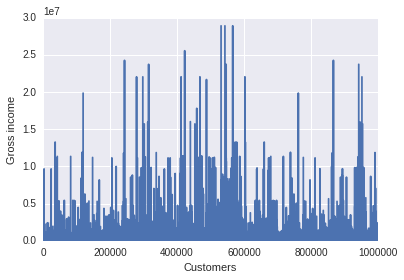

In [608]:
plt.plot(ntrain.renta)
plt.xlabel("Customers")
plt.ylabel("Gross income")

## 7. Sexo and segmento:

There are other variables that contain missing values .. however, let's focus on those two variables cause they might have significant effect on the depend variable .. 

    sexo 	Customer's sex
    segmento 	segmentation: 
                01 - VIP
                02 - Individuals 
                03 - college graduated


In [609]:
ntrain.sexo.unique()

array(['H', 'V', nan], dtype=object)

the value of 1 might indicate typo ! as the sex either H or V .. 

In [610]:
ntrain.sexo.value_counts()

V    529343
H    462407
Name: sexo, dtype: int64

In [611]:
ntrain.segmento.value_counts()

02 - PARTICULARES     537617
03 - UNIVERSITARIO    411369
01 - TOP               42687
Name: segmento, dtype: int64

NAs are also there besides the value of 1 !

## Let's explore the whole variables at the same time .. 
    
instead of working on each seperately !

In [612]:
unique_ids   = pd.Series(ntrain["ncodpers"].unique())
limit_people = 1.2e4
unique_id = unique_ids.sample(n=limit_people)
ntrain = ntrain[ntrain.ncodpers.isin(unique_id)]
ntrain.describe()

,ncodpers,ind_nuevo,indrel,indrel_1mes,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,18951.000000,18805.000000,18805.000000,18805,18805,18685.000000,18805.00000,15628.000000,18951.000000,18951.000000,...,18951.000000,18951.000000,18951.000000,18951.000000,18951.000000,18951.000000,18951.000000,18880.000000,18880.000000,18951.000000
mean,842887.414279,0.008881,1.114650,1,1,26.520150,0.52954,130384.405971,0.000211,0.000053,...,0.005224,0.010659,0.003799,0.053348,0.047755,0.024484,0.004169,0.059428,0.062288,0.142367
std,375841.161856,0.093820,3.350103,0,0,12.692541,0.49914,161763.927377,0.014527,0.007264,...,0.072090,0.102694,0.061523,0.224733,0.213252,0.154551,0.064432,0.236430,0.241685,0.349436
min,15973.000000,0.000000,1.000000,1,1,1.000000,0.00000,8034.150000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,524105.500000,0.000000,1.000000,1,1,15.000000,0.00000,68744.632500,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,947118.000000,0.000000,1.000000,1,1,28.000000,1.00000,101263.755000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1138319.000000,0.000000,1.000000,1,1,35.000000,1.00000,153011.520000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1389847.000000,1.000000,99.000000,1,1,52.000000,1.00000,13268621.280000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Check Null values:


## Let's explore the Date variables .. 

We have two data variables:
1. fecha_dato ==> The table is partitioned for this column
2. fecha_alta ==> The date in which the customer became as the first holder of a contract in the bank

In [613]:
ntrain["fecha_dato"] = pd.to_datetime(ntrain["fecha_dato"],format="%Y-%m-%d")
ntrain["fecha_alta"] = pd.to_datetime(ntrain["fecha_alta"],format="%Y-%m-%d")
ntrain["fecha_dato"].unique()

array(['2015-02-28T00:00:00.000000000', '2015-03-28T00:00:00.000000000',
       '2015-04-28T00:00:00.000000000'], dtype='datetime64[ns]')

In [614]:
ntrain["fecha_alta"].unique()

array(['2013-09-25T00:00:00.000000000', '2013-09-26T00:00:00.000000000',
       'NaT', ..., '2015-03-16T00:00:00.000000000',
       '2010-09-23T00:00:00.000000000', '2008-09-17T00:00:00.000000000'], dtype='datetime64[ns]')

In [615]:
ntrain["fecha_dato"].isnull().any().any()

False

In [616]:
ntrain["fecha_alta"].isnull().any().any()

True

In [617]:
ntrain["fecha_dato"].describe()  # unique values are only two (only two table partitions)

count                   18951
unique                      3
top       2015-03-28 00:00:00
freq                    11977
first     2015-02-28 00:00:00
last      2015-04-28 00:00:00
Name: fecha_dato, dtype: object

In [618]:
ntrain["fecha_alta"].describe()

count                   18805
unique                   3965
top       2014-07-28 00:00:00
freq                      108
first     1995-01-16 00:00:00
last      2015-03-27 00:00:00
Name: fecha_alta, dtype: object

## Let's work on the categorical variables indicate customer status .. 

### 1. ind_actividad_cliente:
active/ inactive customer .. 

In [619]:
## customer indicator .. 
ntrain.ind_actividad_cliente.value_counts()

1    9958
0    8847
Name: ind_actividad_cliente, dtype: int64

Around 9485 active customer and 9076 inactive .. 

It already checked that it contains NAs .. however, let's make a double check before manipulating them ..

In [620]:
ntrain.ind_actividad_cliente.unique()

array([  0.,   1.,  nan])

In [621]:
ntrain.ind_actividad_cliente.isnull().any().any()

True

Null values are not there !! :S :S ..

## Manipulate Null values:

1. If age < 18 or > 100 .. replace it with the mean value .. cuase this is illogical to have age values for bank clients outside this range 

In [622]:
ntrain.loc[(ntrain.age >= 100) | (ntrain.age <= 18),"age"].fillna(ntrain.age.mean)

127       33
208       22
310       35
325       22
403       22
448       23
458       23
489       21
493       22
500       NA
570       21
632       24
656       23
661       52
686       23
705       24
744       23
783       21
789       23
812       39
874       47
914       22
1013      63
1066      29
1100      21
1349      22
1392      22
1463      24
1556      22
1625      29
          ..
998743    49
998837    12
998879    42
998976    39
999032    39
999037    35
999151    40
999161    43
999196    42
999236    39
999290    44
999299    38
999334    58
999376    45
999401    47
999440    71
999621    34
999659    53
999676    50
999678    63
999697    55
999708    22
999744    34
999762    30
999767    34
999804    80
999829    40
999877    45
999916    26
999980    44
Name: age, dtype: object

In [623]:
ntrain.age.isnull().any().any()

False

## Great .. 
Null values are replaced with the mean value ..

Let's fill in the missing values for ind_nuevo variable that indicates the novelity of the customer .. 

Let's check the history of the customer who have null value and fill in his cell by 1 (defualt to treate him as novel customer)

In [624]:
ntrain.loc[ntrain["ind_nuevo"].isnull(),"ind_nuevo"] = 1

In [625]:
ntrain.ind_nuevo.isnull().any().any()

False

Great, missing values are filled in age and ind_nuevo variables ! .. 

Let's check antiguedad variable ..

In [626]:
ntrain.loc[ntrain.antiguedad < 0] 

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1


In [627]:
min(ntrain.antiguedad)

'      3'

No negative values are there and the minimum value is zero .. 

It doesn't contain NAs (as checked above) ..

Let's fill in the missing values for indrel variable .. It is more logical to fill in these values by the median .. ! 

In [628]:
ntrain.loc[ntrain["indrel"].isnull()] = ntrain.indrel.median()

In [629]:
ntrain.indrel.unique()

array([  1.,  99.])

In [630]:
ntrain.indrel.value_counts()

1     18929
99       22
Name: indrel, dtype: int64

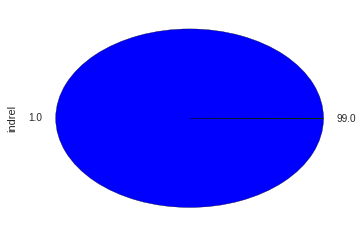

In [631]:
ntrain.indrel.value_counts().plot(x=None, y=None, kind = 'pie')

## Fill NAs for Date variables .. 
Let's check the date variables .. Null values should be replaced by the date of the median !

In [632]:
dates = ntrain.loc[:,"fecha_alta"].sort_values().reset_index()
dates

,index,fecha_alta
0,47814,1970-01-01 00:00:00.000000001
1,830673,1970-01-01 00:00:00.000000001
2,835477,1970-01-01 00:00:00.000000001
3,838242,1970-01-01 00:00:00.000000001
4,838950,1970-01-01 00:00:00.000000001
5,359431,1970-01-01 00:00:00.000000001
6,856535,1970-01-01 00:00:00.000000001
7,875251,1970-01-01 00:00:00.000000001
8,132358,1970-01-01 00:00:00.000000001
9,545789,1970-01-01 00:00:00.000000001


In [633]:
median_date = int(np.median(dates.index.values))
median_date  # the index of the median date

9475

In [634]:
ntrain.loc[ntrain.fecha_alta.isnull(),"fecha_alta"] = dates.loc[median_date,"fecha_alta"]

In [635]:
ntrain.fecha_alta.isnull().any().any()

False

## Dropping unnecessary variables:

We gonna delete Four variables:
1. tipodom: This is the promary address variable and this info. is already exists in other variables
2. cod_prov: The name of the province exists in nomprov (Province name)
3. ult_fec_cli_1t: Last date as primary customer, Almost all its data is missing (sparse variable)
4. conyuemp : Spouse index, almost all its data is missing (sparse variable) 

In [636]:
ntrain.drop(["tipodom","cod_prov", "ult_fec_cli_1t", "conyuemp"],axis=1,inplace=True)

In [637]:
ntrain

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
127,2015-02-28 00:00:00.000000000,1183033,N,ES,V,33,2013-09-25 00:00:00.000000000,0,22,1,...,0,0,0,0,0,0,0,0,0,0
208,2015-02-28 00:00:00.000000000,1183137,N,ES,H,22,2013-09-25 00:00:00.000000000,0,22,1,...,0,0,0,0,0,0,0,0,0,0
310,2015-02-28 00:00:00.000000000,1183750,N,ES,H,35,2013-09-26 00:00:00.000000000,0,22,1,...,0,0,0,0,0,0,0,0,0,0
325,2015-02-28 00:00:00.000000000,1183751,N,ES,V,22,2013-09-26 00:00:00.000000000,0,22,1,...,0,0,0,0,0,0,0,0,0,0
403,2015-02-28 00:00:00.000000000,1183838,N,ES,V,22,2013-09-26 00:00:00.000000000,0,22,1,...,0,0,0,0,0,0,0,0,0,0
448,2015-02-28 00:00:00.000000000,1183621,N,ES,H,23,2013-09-25 00:00:00.000000000,0,22,1,...,0,0,0,0,0,0,0,0,0,1
458,2015-02-28 00:00:00.000000000,1183606,N,ES,H,23,2013-09-25 00:00:00.000000000,0,22,1,...,0,0,0,0,0,0,0,0,0,0
489,2015-02-28 00:00:00.000000000,1183540,N,ES,V,21,2013-09-25 00:00:00.000000000,0,22,1,...,0,0,0,0,0,0,0,0,0,0
493,2015-02-28 00:00:00.000000000,1183536,N,ES,H,22,2013-09-25 00:00:00.000000000,0,22,1,...,0,0,0,0,0,0,0,0,0,0
500,1970-01-01 00:00:00.000000001,1,1,1,1,1,1970-01-01 00:00:00.000000001,1,1,1,...,1,1,1,1,1,1,1,1,1,1


number of columns decreases by two .. which means the columns already deleted !

## nomprov: 
Fill in the missing values by the median deosn't make sense .. 

It is more logical to fill it with the keyword (Unknown) .. 

It also contains value of 1 .. probably this is a typo !

In [638]:
ntrain.loc[ntrain.nomprov.isnull(),"nomprov"] = "UNKNOWN"

## Renta Variable .. 
Let's replace NAs in this variable ..

In [639]:
ntrain.renta.mean(), ntrain.renta.median()

(129177.61141815646, 100623.67499999999)

Mean is bigger than median and difference is huge !! .. 

This means that outliers are there ! .. 

Hence, replacing NAs with the mean value might be misleading .. a more rebust solution is to replace it with the median ! .. 

However, let's divide it down by region and fill in NAs according to the region instead of working on the whole regions at the same time ! .. 

reference ==> https://www.kaggle.com/apryor6/detailed-cleaning-visualization-python

In [640]:
incomes = ntrain.loc[ntrain.renta.notnull(),:].groupby("nomprov").agg({"renta":{"MedianIncome":np.median}})
incomes.sort_values(by=("renta","MedianIncome"),inplace=True)
incomes.reset_index(inplace=True)
incomes.nomprov = incomes.nomprov.astype("category", categories=[i for i in ntrain.nomprov.unique()],ordered=False)
incomes.head()

,nomprov,renta
,,MedianIncome
0,1,1.00
1,BADAJOZ,58733.88
2,CEUTA,59878.38
3,CUENCA,60426.93
4,ALICANTE,60765.09


Again, the value of 1 is typo !! .. 

Where it is come from !! :S

## Let's plot the income distribution by city:

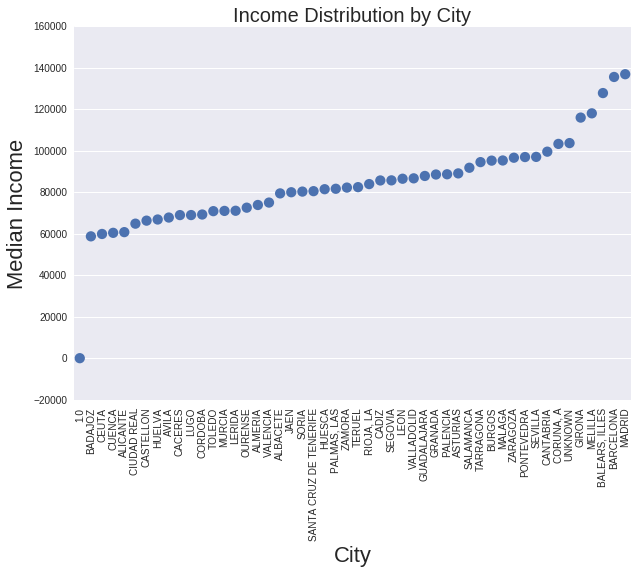

In [641]:
h = sns.factorplot(data=incomes,
                   x="nomprov",
                   y=("renta","MedianIncome"),
                   order=(i for i in incomes.nomprov),
                   size=6,
                   aspect=1.5,
                   scale=1.0,
                   linestyles="None") ## to remove the line between dots 
plt.xticks(rotation=90)
plt.xlabel("City",size=22)
plt.ylabel("Median Income",size=22)
plt.title("Income Distribution by City",size=20)

## Comment:

There is a lot of variations in the median income .. 

Check NAs then assign missing incomes by providence .. 

### Steps:
1. Group the data by city, and reduce to get the median. 
2. Join this intermediate data frame  by the original city names to expand the aggregated median incomes.
3. Order so that there is a 1-to-1 mapping between the rows.
4. The missing values are replaced.

In [642]:
ntrain.renta.isnull().any().any(), ntrain.nomprov.isnull().any().any()

(True, False)

In [643]:
np.count_nonzero(ntrain.renta.isnull().values)

3177

There are 3298 NAs in renta variable (gross income) .. this is why it's important to manipulate them !

In [644]:
grouped = ntrain.groupby("nomprov").agg({"renta":lambda x: x.median(skipna=True)}).reset_index()
new_incomes = pd.merge(ntrain,grouped, how="inner",on="nomprov").loc[:, ["nomprov","renta_y"]]
new_incomes = new_incomes.rename(columns={"renta_y":"renta"}).sort_values("renta").sort_values("nomprov")
ntrain.sort_values("nomprov",inplace=True)
ntrain = ntrain.reset_index()
new_incomes = new_incomes.reset_index()

In [645]:
new_incomes.values

array([[3035, 1.0, 1.0],
       [3163, 1.0, 1.0],
       [3162, 1.0, 1.0],
       ..., 
       [17848, 'ZARAGOZA', 96637.08],
       [17812, 'ZARAGOZA', 96637.08],
       [17735, 'ZARAGOZA', 96637.08]], dtype=object)

In [646]:
ntrain.loc[ntrain.renta.isnull(),"renta"] = new_incomes.loc[ntrain.renta.isnull(),"renta"].reset_index()
ntrain.loc[ntrain.renta.isnull(),"renta"] = ntrain.loc[ntrain.renta.notnull(),"renta"].median()
ntrain.sort_values(by="fecha_dato", inplace=True)

In [647]:
ntrain.renta.isnull().any().any()

False

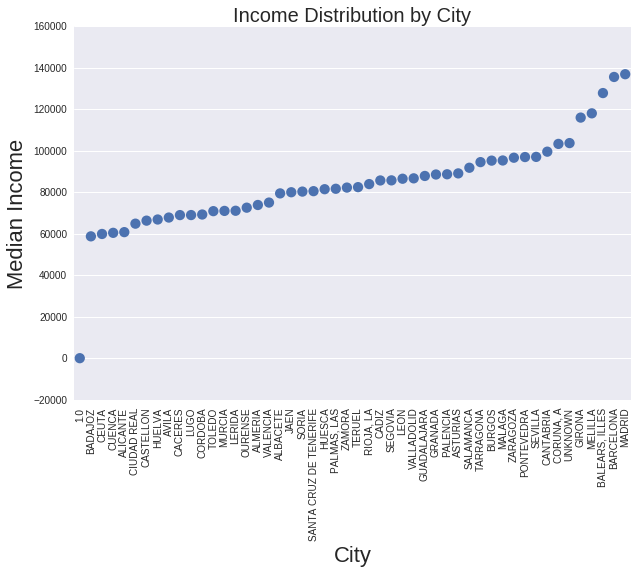

In [648]:
h = sns.factorplot(data=incomes,
                   x="nomprov",
                   y=("renta","MedianIncome"),
                   order=(i for i in incomes.nomprov),
                   size=6,
                   aspect=1.5,
                   scale=1.0,
                   linestyles="None") ## to remove the line between dots 
plt.xticks(rotation=90)
plt.xlabel("City",size=22)
plt.ylabel("Median Income",size=22)
plt.title("Income Distribution by City",size=20)

Yes, the data points become closer to each other !

## Dependent Variables ==> Products:

Let's work on the indicators (Dependent variables) ..

    ind_ahor_fin_ult1 	Saving Account

    ind_aval_fin_ult1 	Guarantees

    ind_cco_fin_ult1 	Current Accounts

    ind_cder_fin_ult1 	Derivada Account

    ind_cno_fin_ult1 	Payroll Account

    ind_ctju_fin_ult1 	Junior Account

    ind_ctma_fin_ult1 	Más particular Account

    ind_ctop_fin_ult1 	particular Account

    ind_ctpp_fin_ult1 	particular Plus Account

    ind_deco_fin_ult1 	Short-term deposits

    ind_deme_fin_ult1 	Medium-term deposits

    ind_dela_fin_ult1 	Long-term deposits

    ind_ecue_fin_ult1 	e-account

    ind_fond_fin_ult1 	Funds

    ind_hip_fin_ult1 	Mortgage

    ind_plan_fin_ult1 	Pensions

    ind_pres_fin_ult1 	Loans

    ind_reca_fin_ult1 	Taxes

    ind_tjcr_fin_ult1 	Credit Card

    ind_valo_fin_ult1 	Securities

    ind_viv_fin_ult1 	Home Account

    ind_nomina_ult1 	Payroll

    ind_nom_pens_ult1 	Pensions

    ind_recibo_ult1 	Direct Debit

In [649]:
ntrain.ix[:,25:48]

,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
94,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
95,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
96,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
97,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
98,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
99,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
93,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
100,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
102,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [650]:
ntrain.ix[:,25:48].describe()

,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,18951.000000,18951.000000,18951.000000,18951.000000,18951.000000,18951.000000,18951.000000,18951.000000,18951.000000,18951.000000,18951.000000,18951.000000,18951.000000,18951.000000,18951.000000,18951.000000,18951.000000,18949.000000,18949.000000,18951.000000
mean,0.095509,0.020104,0.024431,0.145903,0.064113,0.012348,0.009973,0.058256,0.099995,0.027281,0.012875,0.018310,0.011187,0.058941,0.055459,0.032188,0.011873,0.066916,0.069766,0.149702
std,0.293925,0.140361,0.154388,0.353018,0.244960,0.110435,0.099369,0.234232,0.300001,0.162905,0.112740,0.134075,0.105177,0.235521,0.228880,0.176504,0.108316,0.249884,0.254759,0.356788
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


It makes no sense to calc the above describtion for boolean variables .. 

Let's check the NAs and unqiue values ..

In [651]:
ntrain.ix[:,25:48].isnull().any()

ind_cno_fin_ult1     False
ind_ctju_fin_ult1    False
ind_ctma_fin_ult1    False
ind_ctop_fin_ult1    False
ind_ctpp_fin_ult1    False
ind_deco_fin_ult1    False
ind_deme_fin_ult1    False
ind_dela_fin_ult1    False
ind_ecue_fin_ult1    False
ind_fond_fin_ult1    False
ind_hip_fin_ult1     False
ind_plan_fin_ult1    False
ind_pres_fin_ult1    False
ind_reca_fin_ult1    False
ind_tjcr_fin_ult1    False
ind_valo_fin_ult1    False
ind_viv_fin_ult1     False
ind_nomina_ult1       True
ind_nom_pens_ult1     True
ind_recibo_ult1      False
dtype: bool

Only two variables contains NAs ! (ind_nomina_ult1, ind_nom_pens_ult1) 

In [652]:
ntrain.ind_nomina_ult1.median(), ntrain.ind_nom_pens_ult1.median()

(0.0, 0.0)

The median in both is 0, this is why we gonna replace NAs with zero !

In [653]:
ntrain.loc[ntrain.ind_nomina_ult1.isnull(), "ind_nomina_ult1"] = 0
ntrain.loc[ntrain.ind_nom_pens_ult1.isnull(), "ind_nom_pens_ult1"] = 0

In [654]:
ntrain.ind_nomina_ult1.isnull().any().any(), ntrain.ind_nom_pens_ult1.isnull().any().any()

(False, False)

In [655]:
ntrain.sexo.mode(), ntrain.segmento.mode()

(0    V
 dtype: object, 0    02 - PARTICULARES
 dtype: object)

Let's replace the values of sex and segmention by the mode .. as these are categorical variables ..

In [656]:
ntrain.loc[ntrain.segmento.isnull(), "segmento"] =  ntrain.segmento.mode()

In [657]:
ntrain.segmento.isnull().any().any()

True

NAs are still there !! :S

In [658]:
ntrain.segmento.value_counts()

02 - PARTICULARES     10222
03 - UNIVERSITARIO     7748
01 - TOP                829
1.0                     146
Name: segmento, dtype: int64

## Other variables:
indfall  ==>  Deceased index. N/S

tiprel_1mes  ==>   Customer relation type at the beginning of the month, A (active), I (inactive), P (former customer),R (Potential)  

In [659]:
ntrain.indfall.unique()

array([1.0, 'N', 'S'], dtype=object)

In [660]:
ntrain.indfall.mode()

0    N
dtype: object

In [661]:
ntrain.loc[ntrain.indfall.isnull(),"indfall"] = "N"

In [662]:
ntrain.indfall.unique()

array([1.0, 'N', 'S'], dtype=object)

cuase 1 is not treated as NA .. but it still incorrect value !

In [663]:
ntrain.tiprel_1mes.unique(), ntrain.tiprel_1mes.mode()
ntrain.loc[ntrain.tiprel_1mes.isnull(),"tiprel_1mes"] = "I"

In [664]:
ntrain.tiprel_1mes.isnull().any().any()

False

6yeb del2wty el problem enn feh values of 1 .. dool typo but not treated as NAs .. I think I have to convert them to NAs .. then proceed ..

mmm should I really convert it to NA, delete it or just ignore it !! .. 

In case they will be converted to NA .. this is the code ..

ntrain.indfall.replace({1.0: np.NAN}, inplace=True)

ntrain.tiprel_1mes.replace({1.0: np.NAN}, inplace=True)

ntrain.segmento.replace({1.0: np.NAN}, inplace=True)

ntrain.segmento.unique()


## Let's do some visualizations:


The problem is there is a value of 1 exists on top of each column .. besides the spaces inside the fields .. 

One of the solutions is to strip the columns .. the problem yet is in scanning all the columns .. 

In [665]:
type(ntrain.age)
ntrain['age'] = ntrain['age'].convert_objects(convert_numeric=True)
type(ntrain.age)

pandas.core.series.Series

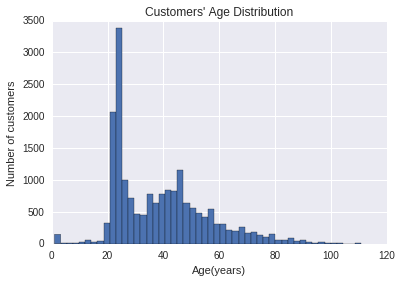

In [666]:
ntrain["age"].hist(bins=50)
plt.title("Customers' Age Distribution")
plt.xlabel("Age(years)")
plt.ylabel("Number of customers") 

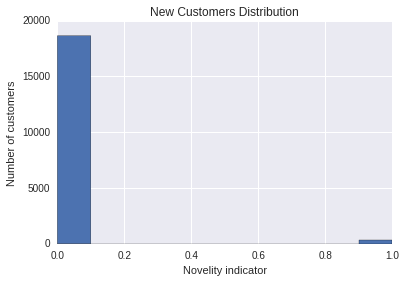

In [667]:
ntrain.ind_nuevo.hist()  ## defualt bins 
plt.title("New Customers Distribution")
plt.xlabel("Novelity indicator")
plt.ylabel("Number of customers") 

This is mainly a binary variable .. One means novel customers while zeros represent old ones.

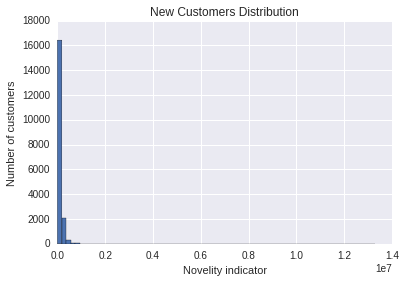

In [668]:
ntrain["renta"].hist(bins = 70)
plt.title("New Customers Distribution")
plt.xlabel("Novelity indicator")
plt.ylabel("Number of customers") 

## ind_empleado:
Employee index: A active, B ex employed, F filial, N not employee, P pasive

In [669]:
ntrain.ind_empleado.value_counts()

N      18794
1.0      146
A          5
F          4
B          2
Name: ind_empleado, dtype: int64

In [670]:
ntrain.loc[ntrain["ind_empleado"].isnull(),"ind_empleado"] = 0

In [671]:
ntrain.ind_empleado.isnull().any().any()

False

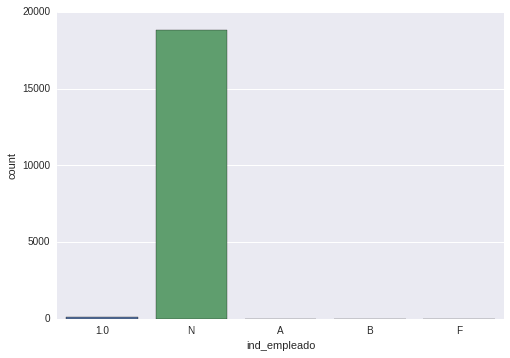

In [672]:
sns.set(style="darkgrid")
ax = sns.countplot(ntrain.ind_empleado)

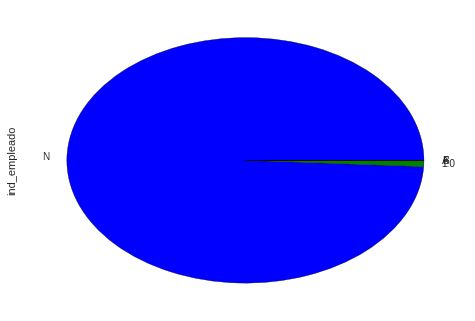

In [673]:
ntrain.ind_empleado.value_counts().plot(x=None, y=None, kind = 'pie')

Those who are not employees have the highest portion followed by NAs ! :S

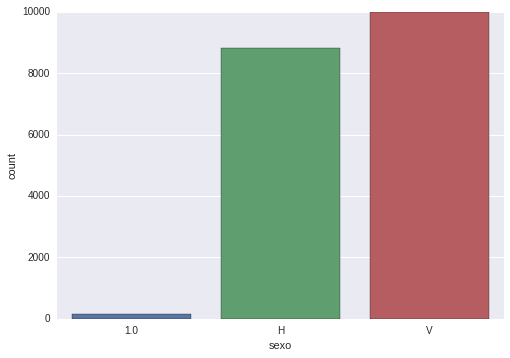

In [674]:
ax = sns.countplot(ntrain.sexo)

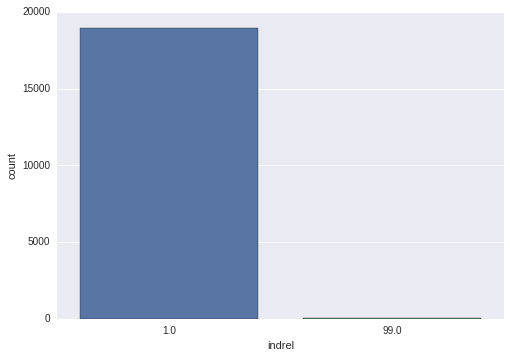

In [675]:
sns.countplot(ntrain.indrel)

1 (First/Primary), 99 (Primary customer during the month but not at the end of the month) .. 

The previous chart shows that about 99% belong to one class and about 1% of the data belong to the rest ..  

Let's try pie chart .. to assure this conclusion .. 



([<matplotlib.patches.Wedge at 0x7f7d68993490>,
  <matplotlib.text.Text at 0x7f7d689431d0>])

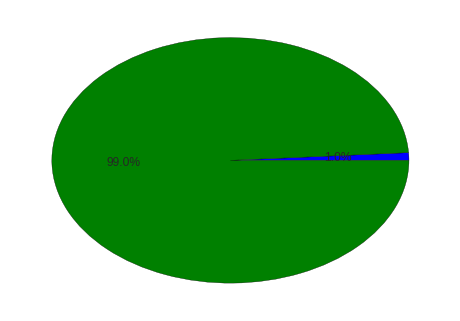

In [676]:
plt.pie(ntrain.indrel.unique(), autopct='%1.1f%%')

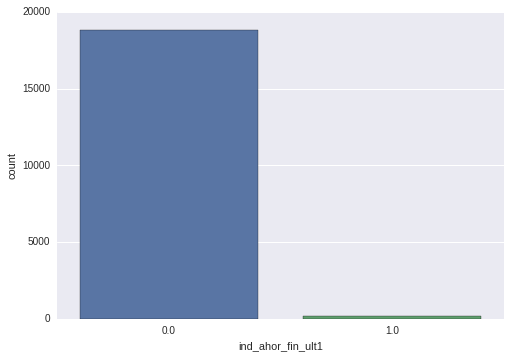

In [677]:
sns.countplot(ntrain.ind_ahor_fin_ult1) ##Saving Account

In [678]:
ntrain["ind_ahor_fin_ult1"].value_counts()

0    18801
1      150
Name: ind_ahor_fin_ult1, dtype: int64

This illustrates the big difference between the two values ! 

## canal_entrada:
channel used by the customer to join

In [679]:
ntrain['canal_entrada'].unique()

array([1.0, 'KHE', 'KAT', 'KHD', 'KFC', 'KHK', 'KHL', 'KFA', 'RED', 'KGV',
       'KAZ', 'KHF', 'KFP', 'KFK', 'KHC', 'KCC', nan, 'KFD', 'KFJ', 'KAB',
       'KFS', 'KAE', 'KAA', 'KAY', 'KAS', 'KES', 'KAW', 'KBZ', '007',
       '013', 'KBQ', 'KAG', 'KCB', 'KCI', 'KBH', 'KBE', 'KAJ', 'KEN',
       'KAF', 'KFN', 'KAR', 'KCM', 'KBB', 'KCN', 'KGX', 'KCH', 'KAQ',
       'KFT', 'KEY', 'KAL', 'KBJ', 'KCL', 'KFE', 'KEL', 'KEZ', 'KBF',
       'KHO', 'KAH', 'KEJ', 'KAP', 'KEI', 'KBO', 'KFG', 'KEW', 'KDR',
       'KDU', 'KDC', 'KEH', 'KBR', 'KAM', 'KEG', 'KFU', 'KAO', 'KAC',
       'KDO', 'KAD', 'KBU', 'KDX', 'KAK', 'KDY', 'KGY', 'KCK', 'KEV',
       'KHN', 'KFF', 'KAI', 'KEE', 'KED', 'KAN', 'KDM', 'KFI', 'KFH',
       'KDF', 'KCS', 'KCU', 'KBG', 'KCG', 'KCD', 'KBL', 'KCE'], dtype=object)

In [680]:
ntrain['canal_entrada'].value_counts().head(15)

KHE    7324
KFC    4220
KAT    4175
KFA     678
KHK     336
KHD     234
1.0     146
KAG     118
KAA      98
KAE      94
KCC      93
RED      90
KAS      85
KBZ      82
KAB      78
Name: canal_entrada, dtype: int64

If we want to display only the top 15 channels .. 


In [681]:
ntrain['canal_entrada'].value_counts().head(15)

KHE    7324
KFC    4220
KAT    4175
KFA     678
KHK     336
KHD     234
1.0     146
KAG     118
KAA      98
KAE      94
KCC      93
RED      90
KAS      85
KBZ      82
KAB      78
Name: canal_entrada, dtype: int64

In [682]:
len(ntrain['canal_entrada'].unique()) # number of unique values 

100

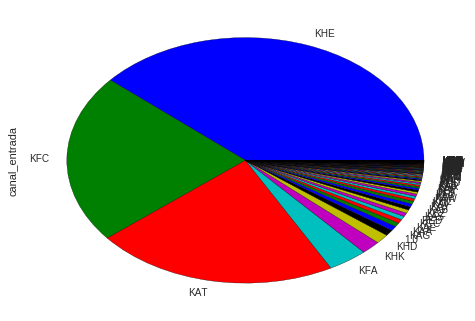

In [683]:
ntrain["canal_entrada"].value_counts().plot(x=None, y=None, kind='pie') 

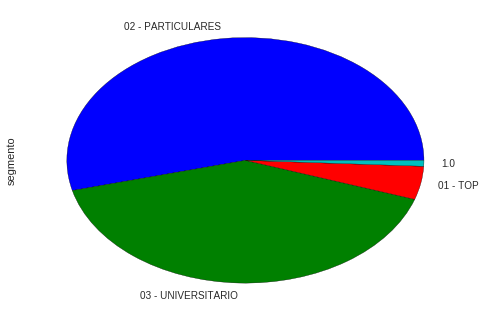

In [684]:
ntrain.segmento.value_counts().plot(x=None, y=None, kind='pie')  # Gross income of the household

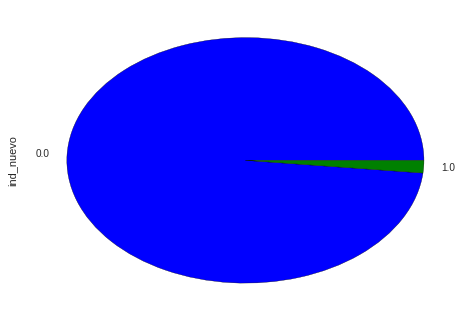

In [685]:
ntrain.ind_nuevo.value_counts().plot(x=None, y=None, kind='pie')

In [686]:
ntrain['pais_residencia'].value_counts()  ## Customer's Country residence

ES     18685
1.0      146
GB        13
IT        10
AR        10
FR         9
PT         8
RO         8
BR         5
VE         5
EC         5
BE         4
US         4
DE         4
MX         3
CL         3
CH         3
CU         3
AU         2
PA         2
PL         2
CO         2
CN         2
CA         2
PY         2
JP         1
DO         1
KR         1
RU         1
SE         1
BO         1
NL         1
GQ         1
GR         1
Name: pais_residencia, dtype: int64

In [687]:
ntrain['pais_residencia'].describe()

count     18951
unique       34
top          ES
freq      18685
Name: pais_residencia, dtype: object

The most frequent value is ES ..

## The relationship between sex and activity index:

In [688]:
ntrain_a = ntrain.loc[:, ['sexo', 'ind_actividad_cliente']].join(ntrain.loc[:, "ind_ahor_fin_ult1": "ind_recibo_ult1"])
ntrain_a

,sexo,ind_actividad_cliente,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
94,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
95,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
96,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
97,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
98,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
99,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
93,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
100,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
102,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [689]:
ntrain_a = ntrain_a.groupby(['sexo', 'ind_actividad_cliente']).sum()
ntrain_a

ind_ahor_fin_ult1  ind_aval_fin_ult1  \
sexo ind_actividad_cliente                                         
1.0  1                                    146                146   
H    0                                      1                  0   
     1                                      0                  1   
V    0                                      0                  0   
     1                                      3                  0   

                            ind_cco_fin_ult1  ind_cder_fin_ult1  \
sexo ind_actividad_cliente                                        
1.0  1                                   146                146   
H    0                                  3936                  0   
     1                                  3276                  3   
V    0                                  3559                  0   
     1                                  4086                  4   

                            ind_cno_fin_ult1  ind_ctju_fin_ult1  \
sexo ind_actividad_cliente                                        
1.0  1                                   146                146   
H    0                                     6                 23   
     1                                   669                 79   
V    0                                    13                 21   
     1                                   976                112   

                            ind_ctma_fin_ult1  ind_ctop_fin_ult1  \
sexo ind_actividad_cliente                                         
1.0  1                                    146                146   
H    0                                     28                310   
     1                                    115                719   
V    0                                     46                524   
     1                                    128               1066   

                            ind_ctpp_fin_ult1  ind_deco_fin_ult1  \
sexo ind_actividad_cliente                                         
1.0  1                                    146                146   
H    0                                     79                  8   
     1                                    334                 28   
V    0                                    120                 16   
     1                                    536                 36   

                                 ...         ind_hip_fin_ult1  \
sexo ind_actividad_cliente       ...                            
1.0  1                           ...                      146   
H    0                           ...                        0   
     1                           ...                       29   
V    0                           ...                        1   
     1                           ...                       68   

                            ind_plan_fin_ult1  ind_pres_fin_ult1  \
sexo ind_actividad_cliente                                         
1.0  1                                    146                146   
H    0                                      0                  5   
     1                                     80                 15   
V    0                                      3                 10   
     1                                    118                 36   

                            ind_reca_fin_ult1  ind_tjcr_fin_ult1  \
sexo ind_actividad_cliente                                         
1.0  1                                    146                146   
H    0                                     19                  5   
     1                                    357                310   
V    0                                     45                  6   
     1                                    550                584   

                            ind_valo_fin_ult1  ind_viv_fin_ult1  \
sexo ind_actividad_cliente                                        
1.0  1                                    146               146   
H    0                                      2 

In [690]:
ntrain_a = ntrain_a.T
ntrain_a.head()

sexo                   1.0     H           V      
ind_actividad_cliente    1     0     1     0     1
ind_ahor_fin_ult1      146     1     0     0     3
ind_aval_fin_ult1      146     0     1     0     0
ind_cco_fin_ult1       146  3936  3276  3559  4086
ind_cder_fin_ult1      146     0     3     0     4
ind_cno_fin_ult1       146     6   669    13   976

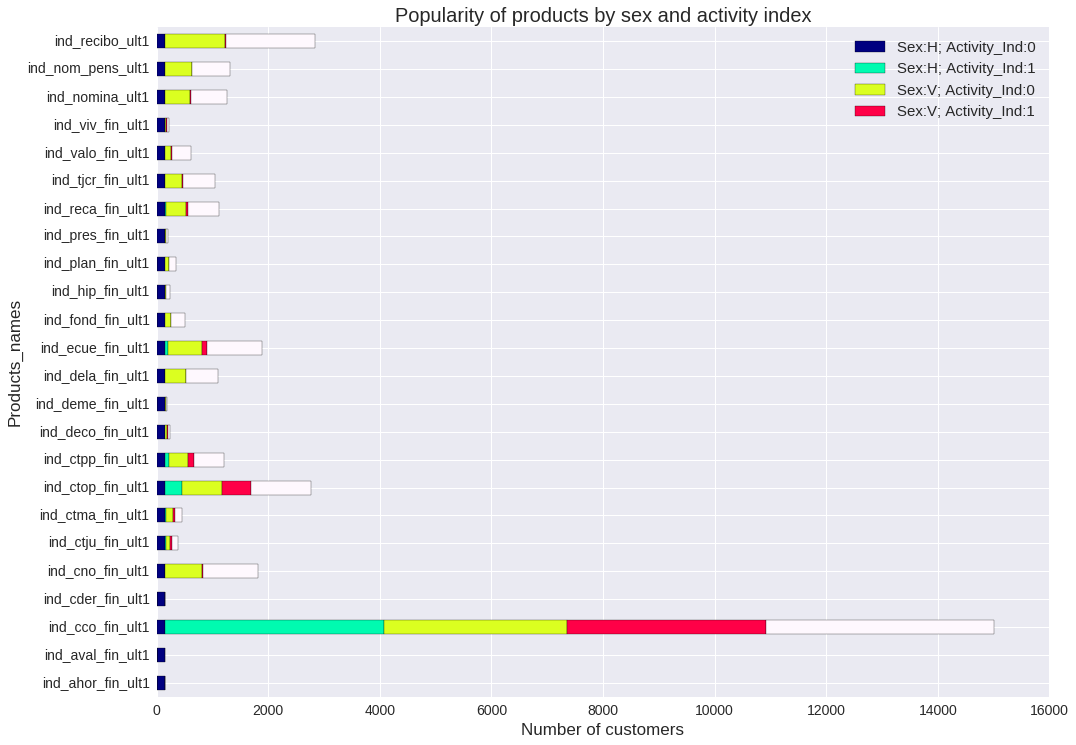

In [691]:
ntrain_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_ncar')
plt.title('Popularity of products by sex and activity index', fontsize=20) 
plt.xlabel('Number of customers', fontsize=17) 
plt.ylabel('Products_names', fontsize=17) 
plt.legend(["Sex:H; Activity_Ind:0", "Sex:H; Activity_Ind:1", "Sex:V; Activity_Ind:0", 
            "Sex:V; Activity_Ind:1"], prop={'size':15}) 

The highest value is Current Accounts .. which means that most of customers use their current accounts ..

Least values are CASA (Saving Accounts and Guarantees)

## Transformation:

Let's add a new column represent total number of used products per customer per month .. 

In [692]:
ntrain["tot_products"] = ntrain.loc[:,"ind_ahor_fin_ult1":"ind_recibo_ult1"].sum(axis=1)

In [693]:
ntrain

,index,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,...,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,tot_products
0,838950,1970-01-01 00:00:00.000000001,1,1,1,1,1,1970-01-01 00:00:00.000000001,1,1,...,1,1,1,1,1,1,1,1,1,24
94,898725,1970-01-01 00:00:00.000000001,1,1,1,1,1,1970-01-01 00:00:00.000000001,1,1,...,1,1,1,1,1,1,1,1,1,24
95,715872,1970-01-01 00:00:00.000000001,1,1,1,1,1,1970-01-01 00:00:00.000000001,1,1,...,1,1,1,1,1,1,1,1,1,24
96,715542,1970-01-01 00:00:00.000000001,1,1,1,1,1,1970-01-01 00:00:00.000000001,1,1,...,1,1,1,1,1,1,1,1,1,24
97,706641,1970-01-01 00:00:00.000000001,1,1,1,1,1,1970-01-01 00:00:00.000000001,1,1,...,1,1,1,1,1,1,1,1,1,24
98,705912,1970-01-01 00:00:00.000000001,1,1,1,1,1,1970-01-01 00:00:00.000000001,1,1,...,1,1,1,1,1,1,1,1,1,24
99,463358,1970-01-01 00:00:00.000000001,1,1,1,1,1,1970-01-01 00:00:00.000000001,1,1,...,1,1,1,1,1,1,1,1,1,24
93,154089,1970-01-01 00:00:00.000000001,1,1,1,1,1,1970-01-01 00:00:00.000000001,1,1,...,1,1,1,1,1,1,1,1,1,24
100,17672,1970-01-01 00:00:00.000000001,1,1,1,1,1,1970-01-01 00:00:00.000000001,1,1,...,1,1,1,1,1,1,1,1,1,24
102,461593,1970-01-01 00:00:00.000000001,1,1,1,1,1,1970-01-01 00:00:00.000000001,1,1,...,1,1,1,1,1,1,1,1,1,24


In [694]:
ntrain["tot_products"]   = pd.to_numeric(ntrain["tot_products"], errors="coerce") 

In [695]:
ntrain

,index,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,...,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,tot_products
0,838950,1970-01-01 00:00:00.000000001,1,1,1,1,1,1970-01-01 00:00:00.000000001,1,1,...,1,1,1,1,1,1,1,1,1,24
94,898725,1970-01-01 00:00:00.000000001,1,1,1,1,1,1970-01-01 00:00:00.000000001,1,1,...,1,1,1,1,1,1,1,1,1,24
95,715872,1970-01-01 00:00:00.000000001,1,1,1,1,1,1970-01-01 00:00:00.000000001,1,1,...,1,1,1,1,1,1,1,1,1,24
96,715542,1970-01-01 00:00:00.000000001,1,1,1,1,1,1970-01-01 00:00:00.000000001,1,1,...,1,1,1,1,1,1,1,1,1,24
97,706641,1970-01-01 00:00:00.000000001,1,1,1,1,1,1970-01-01 00:00:00.000000001,1,1,...,1,1,1,1,1,1,1,1,1,24
98,705912,1970-01-01 00:00:00.000000001,1,1,1,1,1,1970-01-01 00:00:00.000000001,1,1,...,1,1,1,1,1,1,1,1,1,24
99,463358,1970-01-01 00:00:00.000000001,1,1,1,1,1,1970-01-01 00:00:00.000000001,1,1,...,1,1,1,1,1,1,1,1,1,24
93,154089,1970-01-01 00:00:00.000000001,1,1,1,1,1,1970-01-01 00:00:00.000000001,1,1,...,1,1,1,1,1,1,1,1,1,24
100,17672,1970-01-01 00:00:00.000000001,1,1,1,1,1,1970-01-01 00:00:00.000000001,1,1,...,1,1,1,1,1,1,1,1,1,24
102,461593,1970-01-01 00:00:00.000000001,1,1,1,1,1,1970-01-01 00:00:00.000000001,1,1,...,1,1,1,1,1,1,1,1,1,24


Total number of products per customer:

In [696]:
ntrain["tot_products"].value_counts()

1     12299
2      3070
3      1169
4       694
5       470
0       429
6       310
7       177
24      146
8       122
9        44
10       19
11        2
Name: tot_products, dtype: int64

The majority of the customers use only one type of products 

## Total number of products per age:

In [697]:
ntrain_a_ = ntrain.groupby(['age'])['tot_products'].agg('sum')
ntrain_a_

age
1      3504
3         2
4         4
5         9
6         5
7         5
8         6
9        10
10        5
11       26
12       25
13       18
14       20
15       25
16       11
17       20
18       17
19       22
20      317
21     1001
22     1161
23     1545
24     1347
25      819
26      619
27      550
28      511
29      446
30      417
31      326
       ... 
77       92
78      107
79       94
80      105
81       51
82       51
83       47
84       53
85       61
86       63
87       54
88       30
89       36
90       33
91       49
92       14
93       30
94       17
95       15
96       19
97       12
98        9
99        6
101       6
102       2
103       3
104       1
105       3
109       5
111       4
Name: tot_products, dtype: float64

Let's sort them to check which age contributes the most in the majority of the products .. 

In [698]:
ntrain_a_.sort_values(ascending=False).head(20)

age
1     3504
23    1545
24    1347
22    1161
42    1017
21    1001
43     973
45     954
41     947
46     896
40     874
44     844
47     840
25     819
39     808
48     768
49     765
50     654
38     651
37     630
Name: tot_products, dtype: float64

Those who have 23 yeas old have the highest number of products .. 

Let's demonestate this graphically ..

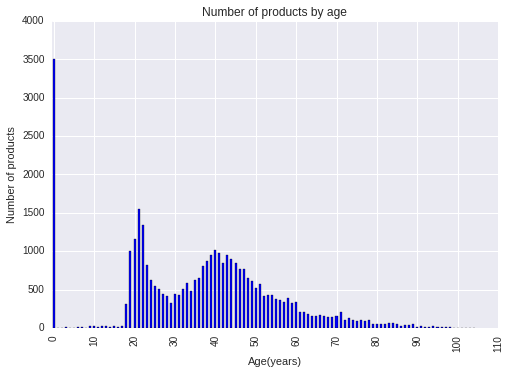

In [699]:
# Number of products by age 
ntrain_a_.plot(kind = 'bar') 
plt.xticks(np.arange(0, 120, 10), [str(x) for x in np.arange(0, 120, 10)]) # range from 0 to 120 with inc. 10
plt.title('Number of products by age') 
plt.xlabel('Age(years)') 
plt.ylabel('Number of products') 

Yup, the highest value is 23 ! .. 

However, somehow this is a bimodal distrubution with another peak at middle aged customers from 35 to 50 years old .. followed by young customers in thier twentieths. 

## Total number of products by segmentation:

In [700]:
ntrain_a = ntrain.groupby(['segmento'])['tot_products'].agg('sum') 
ntrain_a

segmento
1.0                    3504
01 - TOP               3220
02 - PARTICULARES     19650
03 - UNIVERSITARIO     8880
Name: tot_products, dtype: float64

PARTICULARES (Individuals) are the most important group

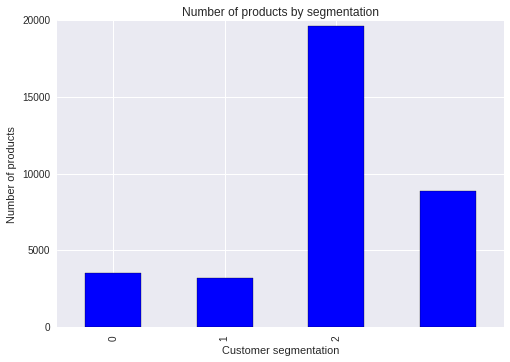

In [701]:
# Number of products by segmentation
ntrain_a.plot(kind = 'bar') 
plt.xticks(np.arange(0, 3), [str(x) for x in np.arange(0, 3)]) # range from 0 to 120 with inc. 10
plt.title('Number of products by segmentation') 
plt.xlabel('Customer segmentation') 
plt.ylabel('Number of products') 

## Number of products per customer index:

In [702]:
ntrain_a = ntrain.groupby(['ind_nuevo'])['tot_products'].agg('count') 
ntrain_a

ind_nuevo
0    18638
1      313
Name: tot_products, dtype: int64

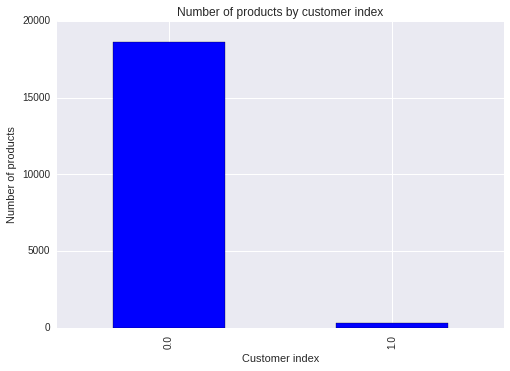

In [703]:
# Number of products by customer index
ntrain_a.plot(kind = 'bar') 
plt.xticks(np.arange(0, 2)) 
plt.title('Number of products by customer index') 
plt.xlabel('Customer index') 
plt.ylabel('Number of products') 

The majority are old customers ..

## Number of products by customer regularity:
i.e. first (1) or primary (99) customer

In [704]:
ntrain_a = ntrain.groupby(['indrel'])['tot_products'].agg('count') 
ntrain_a

indrel
1     18929
99       22
Name: tot_products, dtype: int64

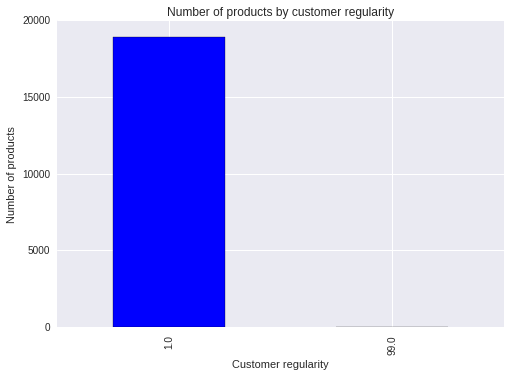

In [705]:
# Number of products by customer regularity
ntrain_a.plot(kind = 'bar') 
plt.xticks(np.arange(0, 2)) 
plt.title('Number of products by customer regularity') 
plt.xlabel('Customer regularity') 
plt.ylabel('Number of products') 



Almost all customers are regular customers throughout the month


## Number of products per customer type at the beginning of the month:

Customer type at the beginning of the month ==>

1 (First/Primary customer), 

2 (co-owner ),P (Potential),

3 (former primary), 

4(former co-owner)

In [706]:
ntrain_a = ntrain.groupby(['indrel_1mes'])['tot_products'].agg('count') 
ntrain_a

indrel_1mes
1    18951
Name: tot_products, dtype: int64

It is weired I have only three unique values in my sample .. ! ..

The highest number of products owned by the 1st type (primary customers) ..

## Number of products by customer relation type:
tiprel_1mes ==> Customer relation type at the beginning of the month,

A (active), 

I (inactive), 

P (former customer),

R (Potential)

In [707]:
ntrain_a = ntrain.groupby(['tiprel_1mes'])['tot_products'].agg('count') 
ntrain_a

tiprel_1mes
1.0     146
A      9598
I      9207
Name: tot_products, dtype: int64

There are no potential customers in the selected sample ..

While, the highest number of products owned by Active customers

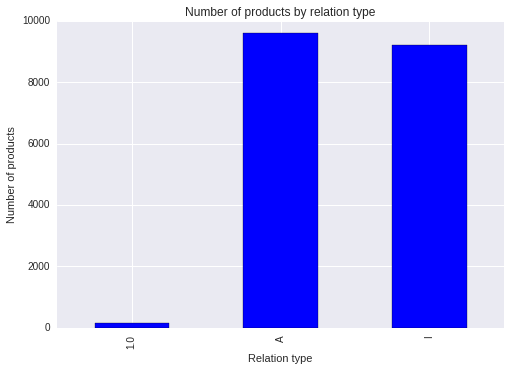

In [708]:
ntrain_a.plot(kind = 'bar') 
plt.xticks(np.arange(0, 3)) 
plt.title('Number of products by relation type') 
plt.xlabel('Relation type') 
plt.ylabel('Number of products') 

## Number of products by country index:
 Foreigner index (S (Yes) or N (No) if the customer's birth country is different than the bank country)

In [709]:
ntrain_a = ntrain.groupby(['indext'])['tot_products'].agg('count') 
ntrain_a

indext
1.0      146
N      17933
S        872
Name: tot_products, dtype: int64

The majority have customer's birth country different from Spain (bank country) 

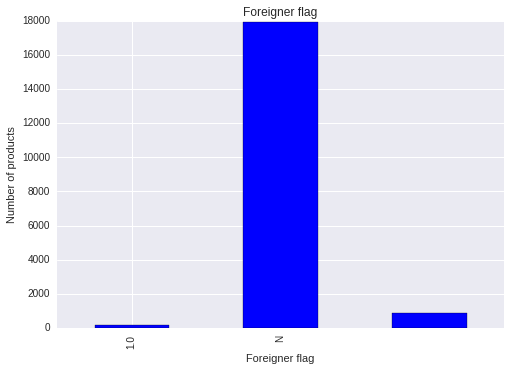

In [710]:
ntrain_a.plot(kind = 'bar') 
plt.xticks(np.arange(0, 2)) 
plt.title('Foreigner flag') 
plt.xlabel('Foreigner flag') 
plt.ylabel('Number of products') 

## Total number of products per income:

In [711]:
ntrain_a = (ntrain.groupby(pd.cut(ntrain['renta'], [0,60000,120000,180000,240000, pd.np.inf], right=False)).sum())
ntrain_a

## right = false if we want to exlude the upper value of the interval 

,index,ncodpers,age,ind_nuevo,indrel,indrel_1mes,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,...,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,tot_products
renta,,,,,,,,,,,,,,,,,,,,,
"[0, 60000)",1404053971,2637651430,95946,171,2931,2931,1374,1.270469e+08,148,146,...,160,167,243,236,181,157,264,270,468,7592
"[60000, 120000)",4890319231,8516223067,375517,92,11960,9804,5068,8.948728e+08,2,0,...,86,34,420,411,198,29,555,582,1332,15917
"[120000, 180000)",1712994206,2640291283,137484,27,3360,3360,1947,4.865751e+08,0,0,...,47,4,221,182,94,14,224,228,532,6001
"[180000, 240000)",747419381,1036456818,61468,16,1434,1434,874,2.955556e+08,0,0,...,29,3,109,107,68,15,120,125,252,2886
"[240000, inf)",724938760,1008216654,62255,7,1422,1422,841,5.525333e+08,0,1,...,25,4,124,115,69,10,105,117,253,2863


In [712]:
ntrain_a["tot_products"]

renta
[0, 60000)           7592
[60000, 120000)     15917
[120000, 180000)     6001
[180000, 240000)     2886
[240000, inf)        2863
Name: tot_products, dtype: float64

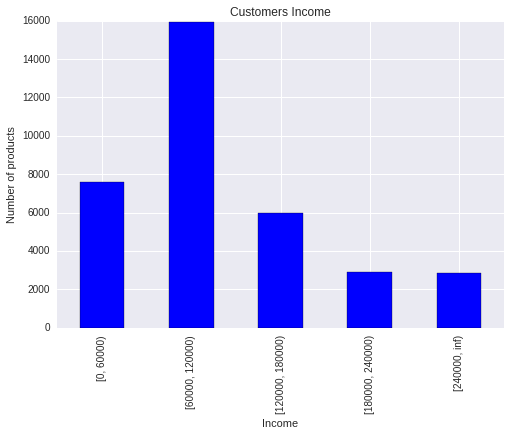

In [713]:
ntrain_a["tot_products"].plot(kind = 'bar') 
plt.xticks(np.arange(0, 5)) 
plt.title('Customers Income') 
plt.xlabel('Income') 
plt.ylabel('Number of products') 

The majority of the customer have income within the interval of 60000 and 120000  

## Number of products per channel:
channel used by the customer to join

In [714]:
ntrain_a = ntrain.groupby(['canal_entrada'])['tot_products'].agg('sum') 
ntrain_a

canal_entrada
1.0    3504
007      78
013     104
KAA     209
KAB     162
KAC      40
KAD      29
KAE     176
KAF      90
KAG     287
KAH      64
KAI     104
KAJ      83
KAK       8
KAL      17
KAM      36
KAN       2
KAO      13
KAP      26
KAQ      15
KAR      88
KAS     270
KAT    9471
KAW     103
KAY     109
KAZ     101
KBB       4
KBE       2
KBF      10
KBG       8
       ... 
KEW       2
KEY      73
KEZ      17
KFA    1414
KFC    8699
KFD     113
KFE       2
KFF      15
KFG       6
KFH       3
KFI       2
KFJ      32
KFK      20
KFN      12
KFP      34
KFS      24
KFT      23
KFU      22
KGV      18
KGX      19
KGY      14
KHC      73
KHD     249
KHE    7704
KHF      15
KHK     490
KHL      86
KHN       8
KHO       3
RED     174
Name: tot_products, dtype: float64

This way is meaningless with this variable .. ! 

let's dig deeper in thie variable and check the most effective channels ..

In [715]:
ntrain["canal_entrada"].value_counts().head(15)

KHE    7324
KFC    4220
KAT    4175
KFA     678
KHK     336
KHD     234
1.0     146
KAG     118
KAA      98
KAE      94
KCC      93
RED      90
KAS      85
KBZ      82
KAB      78
Name: canal_entrada, dtype: int64

Most of the customers joined through three major channels (KHE, KFC and KAT)

In [716]:
len(ntrain["canal_entrada"].unique())

100

As the 1st 6 channels contributes the most .. 
and to be able to visualze, we are going to exclude any channel has a contribution less than 1%.

In [717]:
# Let's extract the necessary columns for this step
ntrain_a = ntrain.loc[:, ['canal_entrada']].join(ntrain.loc[:, 'ind_ahor_fin_ult1':'ind_recibo_ult1'])
ntrain_a.head()

,canal_entrada,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
94,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
95,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
96,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
97,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [718]:
# Let's subset the data to keep only the records from the six major channels
subset = ["KHE", "KAT", "KFC", "KFA", "KHK", "KHD"]
ntrain_a = ntrain_a.loc[ntrain_a['canal_entrada'].isin(subset)]
ntrain_a.head()

,canal_entrada,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
5236,KHE,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14881,KHE,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14883,KHE,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5233,KHE,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5232,KHE,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [719]:
ntrain_a = ntrain_a.groupby(['canal_entrada']).agg('sum')
ntrain_a = ntrain_a.T
ntrain_a

canal_entrada,KAT,KFA,KFC,KHD,KHE,KHK
ind_ahor_fin_ult1,3,0,0,0,0,0
ind_aval_fin_ult1,1,0,0,0,0,0
ind_cco_fin_ult1,2693,431,2837,226,7179,267
ind_cder_fin_ult1,4,0,2,0,0,0
ind_cno_fin_ult1,647,93,554,6,115,30
ind_ctju_fin_ult1,82,33,116,0,0,0
ind_ctma_fin_ult1,93,28,131,0,0,15
ind_ctop_fin_ult1,1027,134,914,0,0,0
ind_ctpp_fin_ult1,454,73,337,0,0,0
ind_deco_fin_ult1,18,3,5,0,0,51


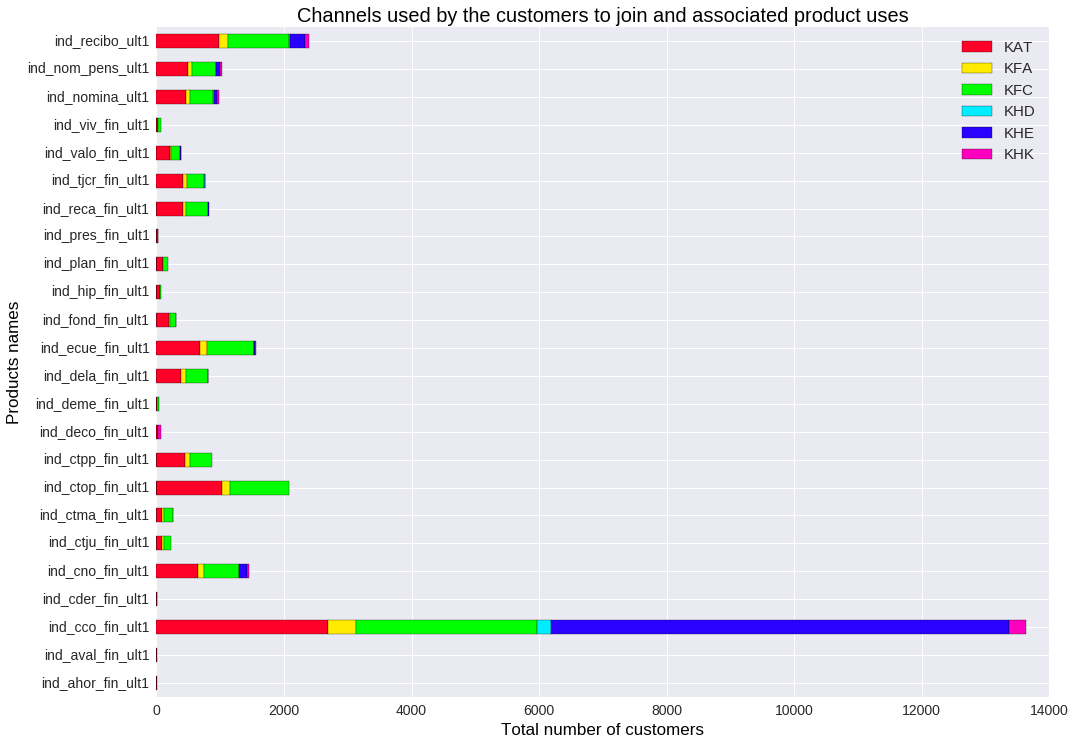

In [720]:
# Channels used by the customer to join and the purchased products
ntrain_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_rainbow')
plt.title('Channels used by the customers to join and associated product uses', fontsize=20, color='black') 
plt.xlabel('Total number of customers', fontsize=17, color='black') 
plt.ylabel('Products names', fontsize=17, color='black') 
plt.legend(prop={'size':15}) 

Current acounts are dominant !

## Number of products by customer seniority:

In [721]:
ntrain_a = ntrain.groupby(['antiguedad'])['tot_products'].agg('sum') 
ntrain_a

antiguedad
1.0        3504
      3       2
      4      56
      5     172
      6     137
      7     146
      8     447
      9     597
     10     704
     11     275
     12     730
     13     137
     14     104
     15      70
     16     207
     17      67
     18     114
     19     118
     20     212
     21     560
     22     496
     23     367
     24     214
     25     178
     26     125
     27     116
     28     105
     29     132
     30     140
     31     160
           ... 
    216      19
    217      31
    218      39
    219      61
    220      39
    221      45
    222      36
    223      53
    224      45
    225      48
    226      25
    227       2
    228      45
    229      22
    230      19
    231      45
    232      19
    233      12
    234      19
    235      39
    236      34
    237      62
    238      56
    239      12
    240      10
    241      25
    242      11
    244       1
    245      19
    246       9
Name: tot_pro

again .. this is meaningless for a numerical values column .. 

Let's extract the most effective columns for this relationship  (grouping the data into intervals) .. 

In [725]:
ntrain_a = ntrain.loc[:, ['antiguedad']].join(ntrain.loc[:, 'ind_ahor_fin_ult1':'ind_recibo_ult1'])
ntrain_a.head()

,antiguedad,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
94,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
95,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
96,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
97,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [727]:
# Let's create seniority groups
ntrain_a = (ntrain_a.groupby(pd.cut(ntrain_a['antiguedad'], [0,50,100,150,200, pd.np.inf], right=False)).sum())
ntrain_a

,index,ncodpers,age,ind_nuevo,indrel,indrel_1mes,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,...,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,tot_products
antiguedad,,,,,,,,,,,,,,,,,,,,,
"[0, 50)",67312483,146,146,146,146,146,146,146,146,146,...,146,146,146,146,146,146,146,146,146,3504
"[50, 100)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"[100, 150)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"[150, 200)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"[200, inf)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
why NAs !! :S